<a href="https://colab.research.google.com/github/sandya07/Engineering-Graduate-Salary-Prediction-Capstone-Project----using-ML/blob/main/Classification_project_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enginerring Gradute Salary Price Prediction

importing necessary dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('/content/Engineering_graduate_salary.csv')

In [ ]:
df.head()

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399,f,22-10-1990,87.80,cbse,2009,84.00,cbse,6920,1,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,m,15-05-1990,57.00,cbse,2010,64.50,cbse,6624,2,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,m,21-08-1989,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,m,04-05-1991,84.30,cbse,2009,86.00,cbse,8195,1,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,f,30-10-1990,82.00,cbse,2008,75.00,cbse,4889,2,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [ ]:
df.tail()

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
2993,103174,f,17-04-1989,75.00,0,2005,73.00,0,1263,2,...,-1,-1,-1,-1,-1.1901,0.9688,-1.0697,1.35490,0.0284,120000
2994,352811,f,22-07-1991,84.00,state board,2008,77.00,state board,9481,2,...,-1,-1,-1,-1,-0.1082,0.0328,-0.4891,-0.29020,0.5024,120000
2995,287070,m,24-11-1988,91.40,bsemp,2006,65.56,bsemp,547,2,...,-1,-1,-1,-1,-0.8810,0.1888,-0.3440,0.06230,0.6603,385000
2996,317336,m,25-08-1988,88.64,karnataka education board,2006,65.16,karnataka education board,1629,2,...,-1,-1,-1,-1,1.4374,1.2808,-0.4891,-1.46537,0.5419,530000
2997,993701,m,27-05-1992,77.00,state board,2009,75.50,state board,1111,2,...,-1,-1,-1,-1,-0.5899,-1.9521,0.3174,1.16010,-2.3937,200000


In [ ]:
df.shape


(2998, 34)

In [ ]:
df.columns

Index(['ID', 'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'Salary'],
      dtype='object')

Data Cleaning

In [ ]:
df.drop(['ID','DOB','10board','12graduation','12board','CollegeID','CollegeCityID', 'CollegeCityTier',
       'CollegeState','GraduationYear', ],axis = 1,inplace = True)

In [ ]:
df.head()

,Gender,10percentage,12percentage,CollegeTier,Degree,Specialization,collegeGPA,English,Logical,Quant,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,f,87.80,84.00,1,B.Tech/B.E.,instrumentation and control engineering,73.82,650,665,810,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,m,57.00,64.50,2,B.Tech/B.E.,computer science & engineering,65.00,440,435,210,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,m,77.33,85.17,2,B.Tech/B.E.,electronics & telecommunications,61.94,485,475,505,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,m,84.30,86.00,1,B.Tech/B.E.,computer science & engineering,80.40,675,620,635,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,f,82.00,75.00,2,B.Tech/B.E.,biotechnology,64.30,575,495,365,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2993    False
2994    False
2995    False
2996    False
2997    False
Length: 2998, dtype: bool

In [ ]:
df.isnull().sum()

Gender                   0
10percentage             0
12percentage             0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
Salary                   0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 2998 non-null   object 
 1   10percentage           2998 non-null   float64
 2   12percentage           2998 non-null   float64
 3   CollegeTier            2998 non-null   int64  
 4   Degree                 2998 non-null   object 
 5   Specialization         2998 non-null   object 
 6   collegeGPA             2998 non-null   float64
 7   English                2998 non-null   int64  
 8   Logical                2998 non-null   int64  
 9   Quant                  2998 non-null   int64  
 10  Domain                 2998 non-null   float64
 11  ComputerProgramming    2998 non-null   int64  
 12  ElectronicsAndSemicon  2998 non-null   int64  
 13  ComputerScience        2998 non-null   int64  
 14  MechanicalEngg         2998 non-null   int64  
 15  Elec

In [ ]:
df.describe()

,10percentage,12percentage,CollegeTier,collegeGPA,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
count,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,...,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2.998000e+03
mean,77.666264,74.341061,1.924616,71.509857,501.066378,500.431621,514.137759,0.508458,351.868579,96.228152,...,24.138759,16.267845,31.068379,1.946965,-0.038714,0.126217,-0.008662,-0.145965,-0.141111,3.051748e+05
std,10.002785,11.120299,0.264053,8.122462,105.304512,87.299850,122.194955,0.463373,204.526227,158.737747,...,99.785138,86.054739,103.552963,32.241501,1.024974,0.955831,0.962695,1.012901,1.007134,2.123312e+05
min,43.000000,40.000000,1.000000,6.630000,180.000000,195.000000,120.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-3.893300,-5.781600,-4.600900,-2.643000,-7.375700,3.500000e+04
25%,71.140000,66.000000,2.000000,66.530000,425.000000,441.250000,430.000000,0.342315,295.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-0.649100,-0.435300,-0.604800,-0.868200,-0.669200,1.800000e+05
50%,78.965000,74.000000,2.000000,71.800000,500.000000,505.000000,515.000000,0.622643,415.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.172700,-0.094300,3.000000e+05
75%,85.600000,82.600000,2.000000,76.300000,570.000000,565.000000,595.000000,0.835612,495.000000,233.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400,3.700000e+05
max,97.760000,98.700000,2.000000,99.930000,875.000000,795.000000,900.000000,0.999910,804.000000,612.000000,...,623.000000,660.000000,548.000000,500.000000,1.995300,1.904800,2.161700,3.352500,1.630200,4.000000e+06


WORKING SOME COLUMNS WHICH CAN BE FREE FROM OUTLIERS

Text(0, 0.5, 'College GPA')

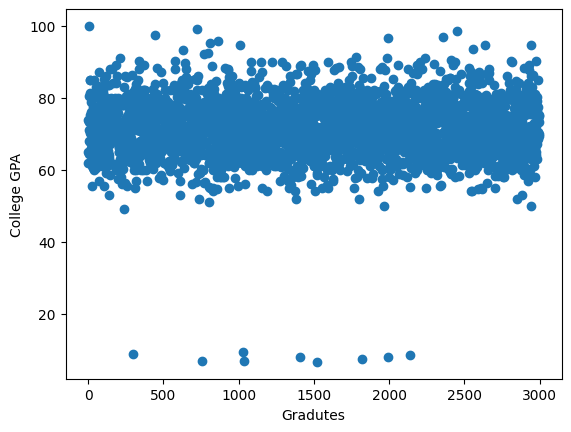

In [ ]:
plt.scatter(df.index,df['collegeGPA'])
plt.xlabel('Gradutes')
plt.ylabel('College GPA')

In [ ]:
df = df[(df['collegeGPA'])>=40]
df.shape

(2989, 24)

In [ ]:
df.Specialization.unique()

array(['instrumentation and control engineering',
       'computer science & engineering',
       'electronics & telecommunications', 'biotechnology',
       'mechanical engineering', 'information technology',
       'electronics and communication engineering',
       'computer engineering', 'computer application',
       'computer science and technology', 'electrical engineering',
       'automobile/automotive engineering',
       'electronics and electrical engineering',
       'information science engineering', 'chemical engineering',
       'instrumentation engineering', 'electronics & instrumentation eng',
       'ceramic engineering', 'metallurgical engineering',
       'aeronautical engineering', 'electronics engineering',
       'electronics and instrumentation engineering',
       'applied electronics and instrumentation', 'civil engineering',
       'computer and communication engineering',
       'industrial & production engineering', 'computer networking',
       'other', '

In [ ]:
df.Specialization.value_counts()

electronics and communication engineering      670
computer science & engineering                 556
information technology                         503
computer engineering                           414
computer application                           201
mechanical engineering                         152
electronics and electrical engineering         148
electronics & telecommunications                89
electrical engineering                          63
electronics & instrumentation eng               24
instrumentation and control engineering         18
information science engineering                 18
electronics and instrumentation engineering     18
civil engineering                               15
electronics engineering                         12
biotechnology                                   12
other                                           10
industrial & production engineering              8
chemical engineering                             7
applied electronics and instrum

In [ ]:
specialization = df.Specialization.value_counts(ascending = False)
specialization

electronics and communication engineering      670
computer science & engineering                 556
information technology                         503
computer engineering                           414
computer application                           201
mechanical engineering                         152
electronics and electrical engineering         148
electronics & telecommunications                89
electrical engineering                          63
electronics & instrumentation eng               24
instrumentation and control engineering         18
information science engineering                 18
electronics and instrumentation engineering     18
civil engineering                               15
electronics engineering                         12
biotechnology                                   12
other                                           10
industrial & production engineering              8
chemical engineering                             7
applied electronics and instrum

In [ ]:
specializationlessthan10 = specialization[specialization<=10]
specializationlessthan10

other                                      10
industrial & production engineering         8
chemical engineering                        7
applied electronics and instrumentation     5
mechanical and automation                   5
telecommunication engineering               4
automobile/automotive engineering           4
computer science and technology             4
aeronautical engineering                    3
instrumentation engineering                 3
electronics and computer engineering        3
mechatronics                                3
metallurgical engineering                   2
industrial engineering                      2
biomedical engineering                      2
information & communication technology      1
electronics                                 1
embedded systems technology                 1
industrial & management engineering         1
electrical and power engineering            1
computer and communication engineering      1
mechanical & production engineerin

In [ ]:
def removespecializationlessthan10(value):
    if value in specializationlessthan10:
        return 'other'
    else:
        return value
df.Specialization = df.Specialization.apply(removespecializationlessthan10)
df.Specialization.unique()

array(['instrumentation and control engineering',
       'computer science & engineering',
       'electronics & telecommunications', 'biotechnology',
       'mechanical engineering', 'information technology',
       'electronics and communication engineering',
       'computer engineering', 'computer application', 'other',
       'electrical engineering', 'electronics and electrical engineering',
       'information science engineering',
       'electronics & instrumentation eng', 'electronics engineering',
       'electronics and instrumentation engineering', 'civil engineering'],
      dtype=object)

DATA VISUALIZATION

<Axes: xlabel='10percentage', ylabel='12percentage'>

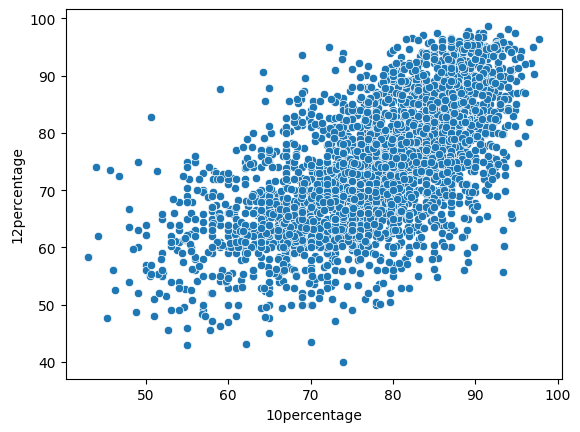

In [ ]:
sns.scatterplot(data=df, x="10percentage", y="12percentage")


<Axes: xlabel='10percentage', ylabel='12percentage'>

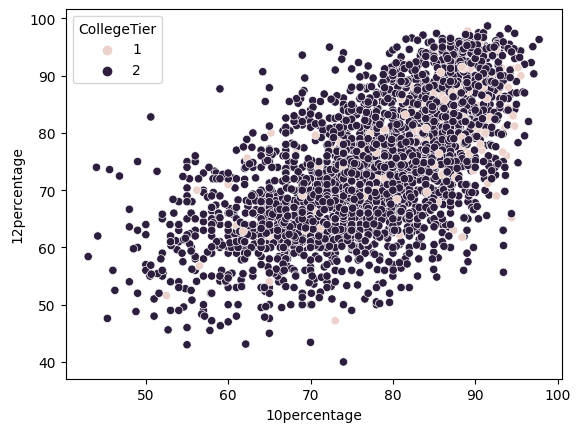

In [ ]:
sns.scatterplot(data=df, x="10percentage", y="12percentage", hue="CollegeTier")

<Axes: xlabel='Gender', ylabel='count'>

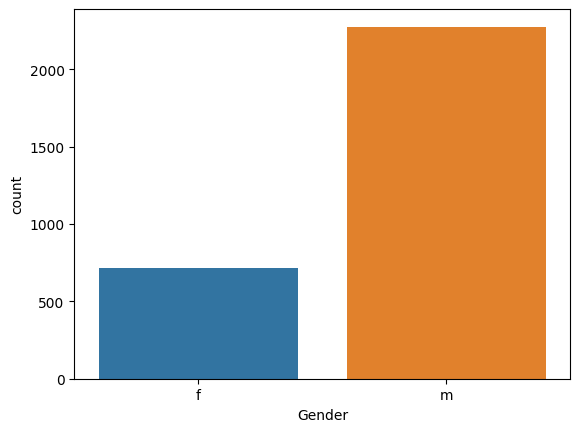

In [ ]:
sns.countplot(data=df, x='Gender')

Text(0, 0.5, 'Salary')

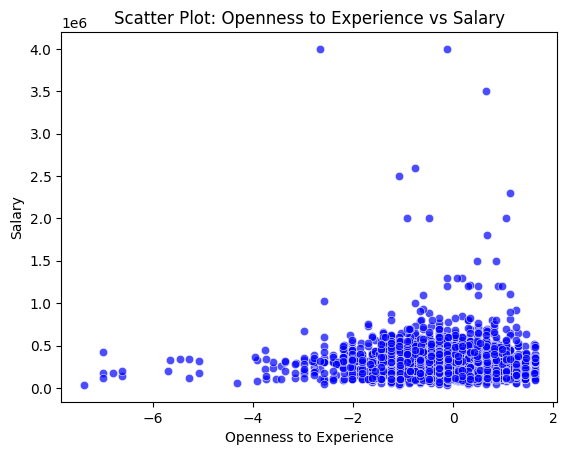

In [ ]:
sns.scatterplot(x='openess_to_experience', y='Salary', data=df, color='blue', marker='o', alpha=0.7)

# Add title and labels
plt.title('Scatter Plot: Openness to Experience vs Salary')
plt.xlabel('Openness to Experience')
plt.ylabel('Salary')


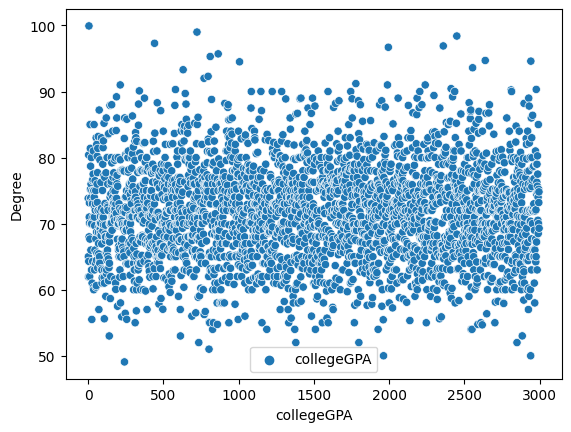

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
variables_to_plot = ['collegeGPA', 'Degree']
sns.scatterplot(df[variables_to_plot])
plt.xlabel('collegeGPA')
plt.ylabel('Degree')
plt.show()

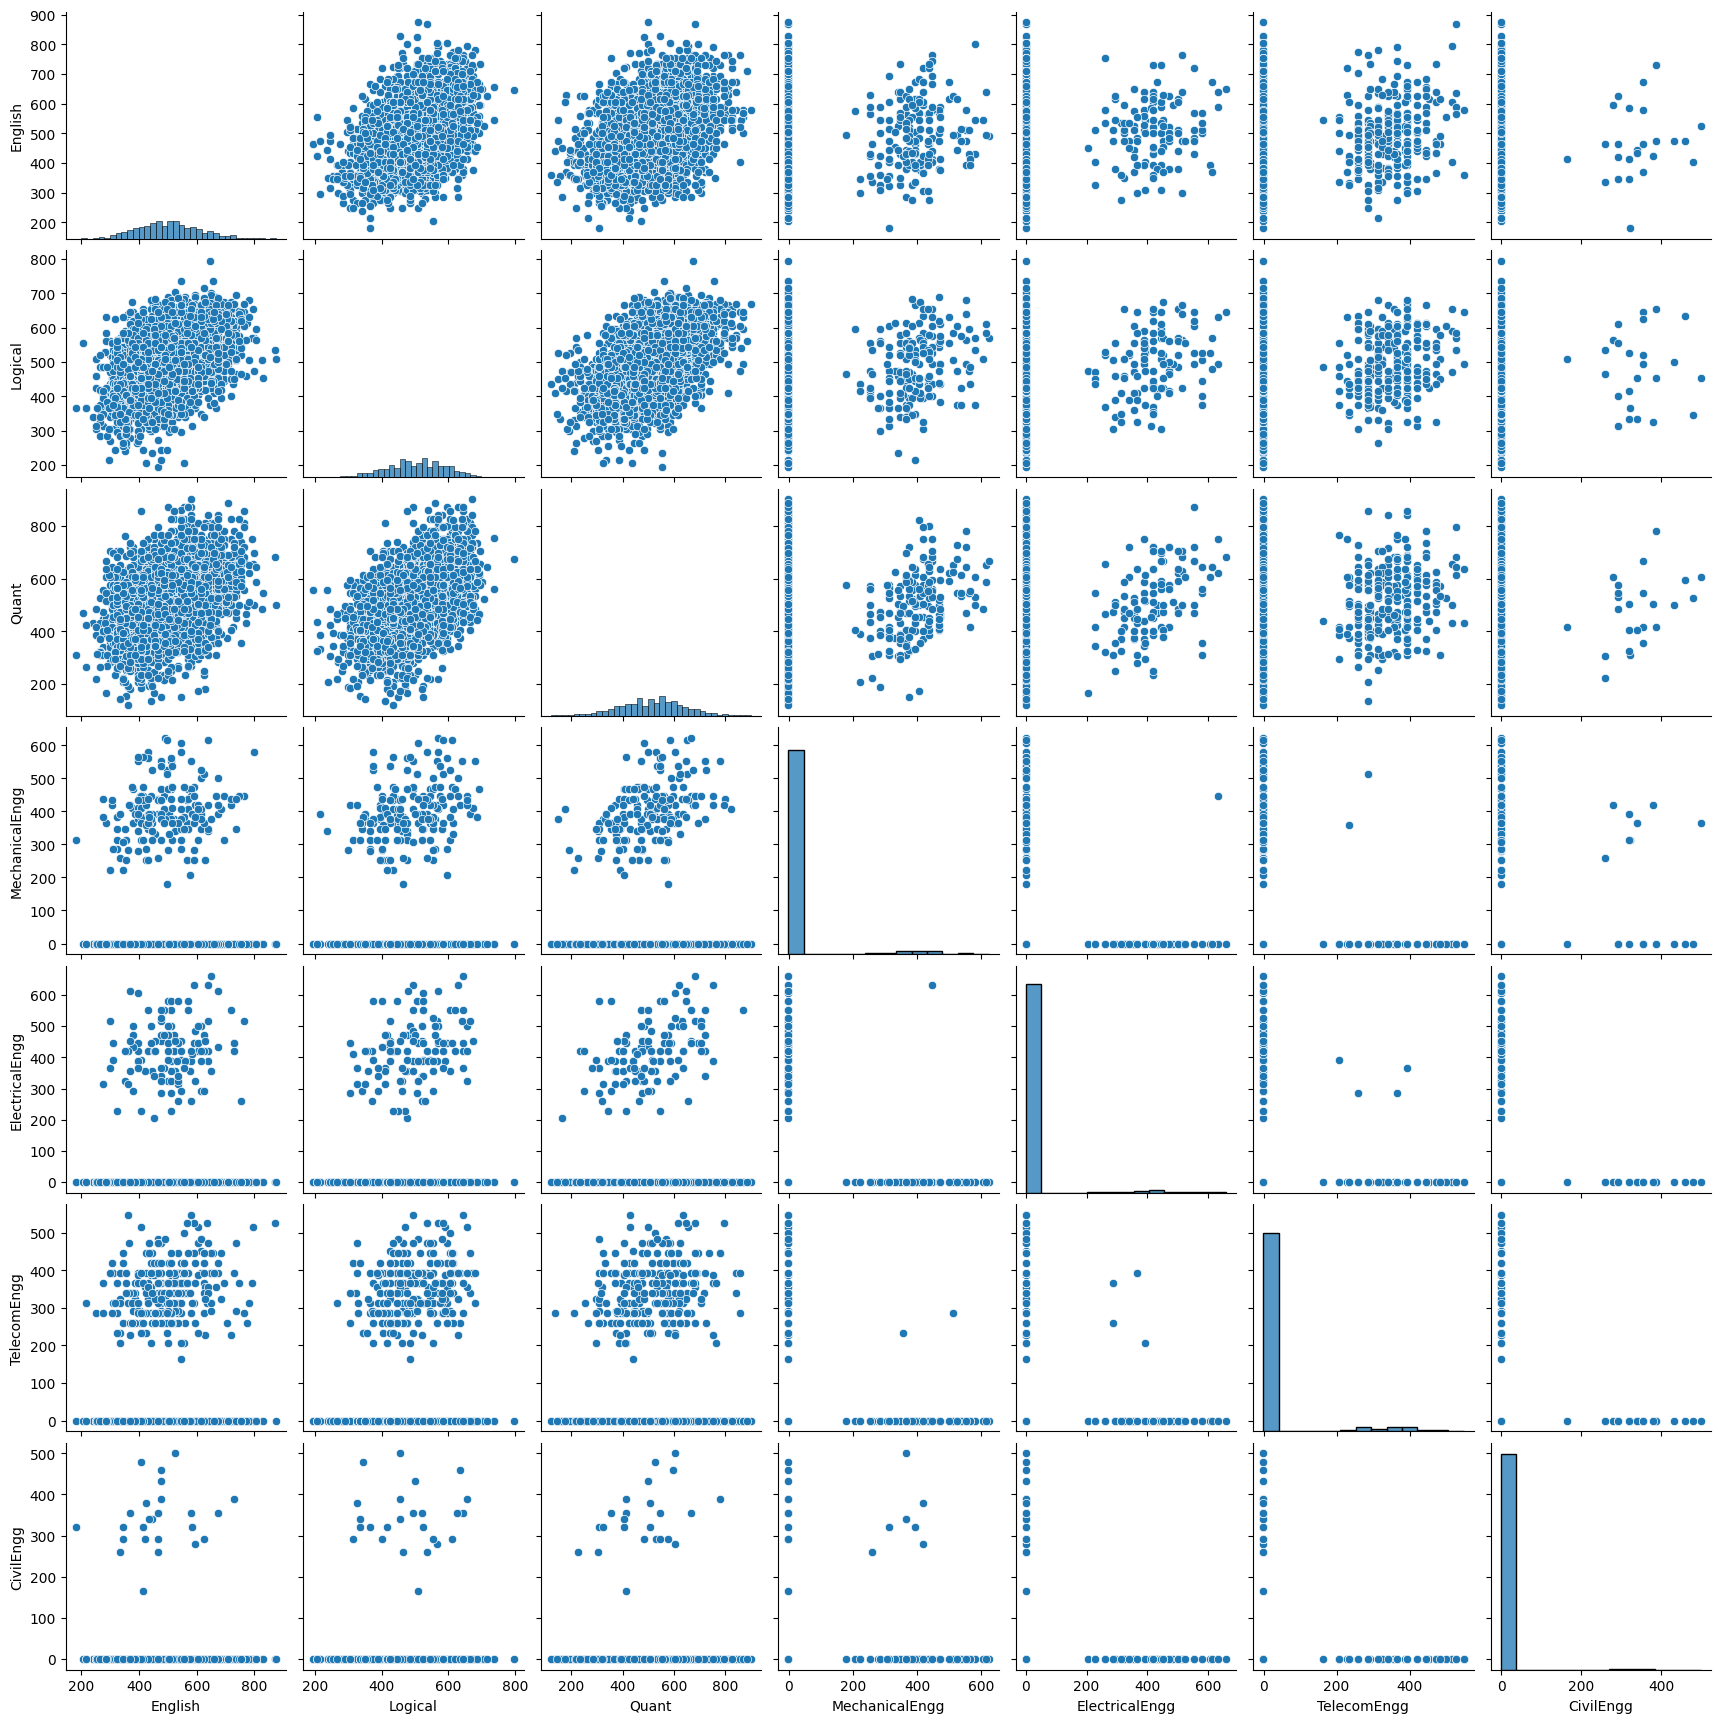

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
variables_to_plot = ['English','Logical',	'Quant','MechanicalEngg','ElectricalEngg','TelecomEngg','CivilEngg']
sns.pairplot(df[variables_to_plot])
plt.show()

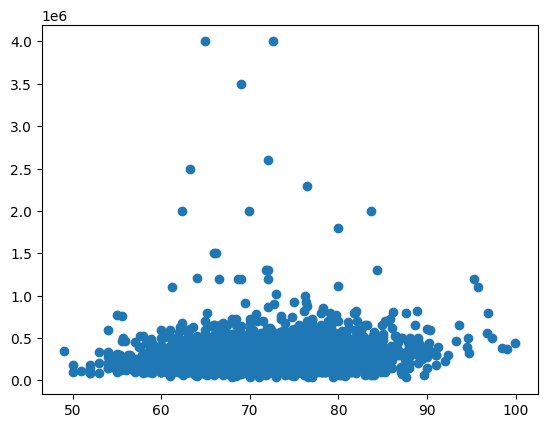

In [ ]:
plt.scatter( df['collegeGPA'], df['Salary'])

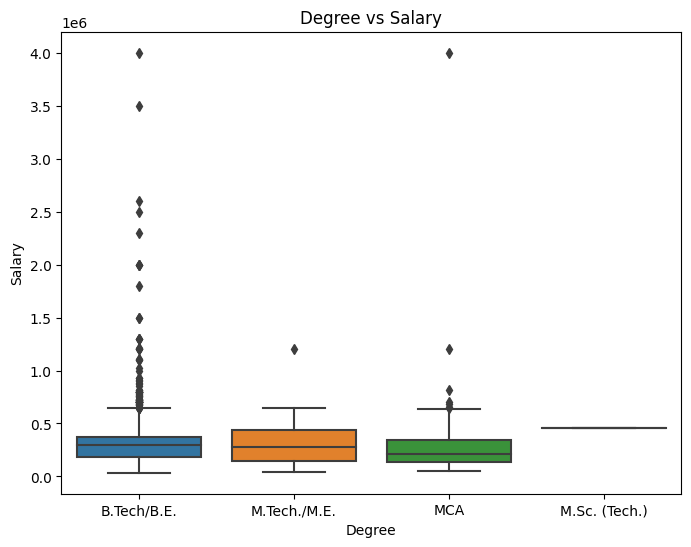

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot( x=df['Degree'], y=df['Salary'] )

plt.title('Degree vs Salary')
plt.show()

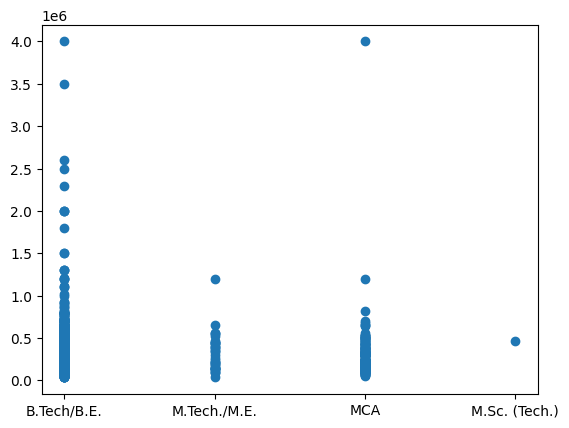

In [ ]:
plt.scatter( df['Degree'], df['Salary'])

In [ ]:
df['openess_to_experience'] = df['openess_to_experience'].apply(lambda x: 0 if x < 0 else x)

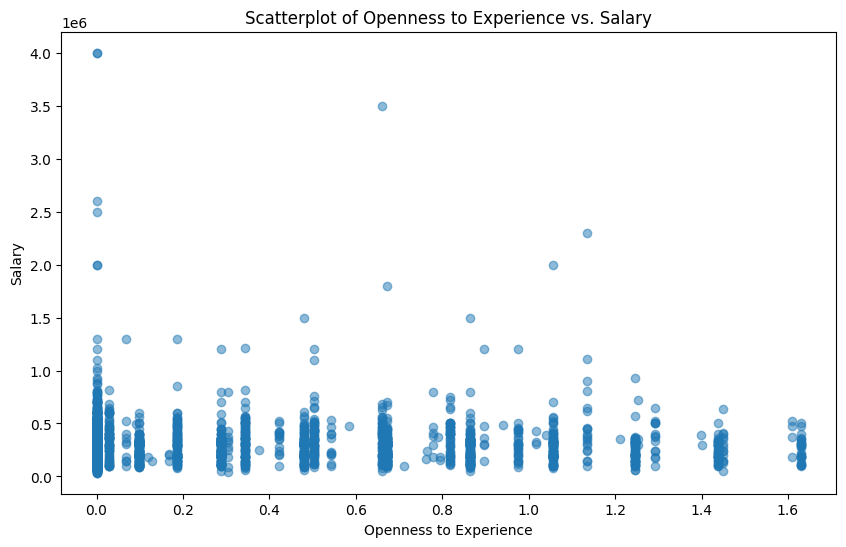

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['openess_to_experience'], df['Salary'], alpha=0.5)
plt.xlabel('Openness to Experience')
plt.ylabel('Salary')
plt.title('Scatterplot of Openness to Experience vs. Salary')
plt.show()


<ipython-input-404-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

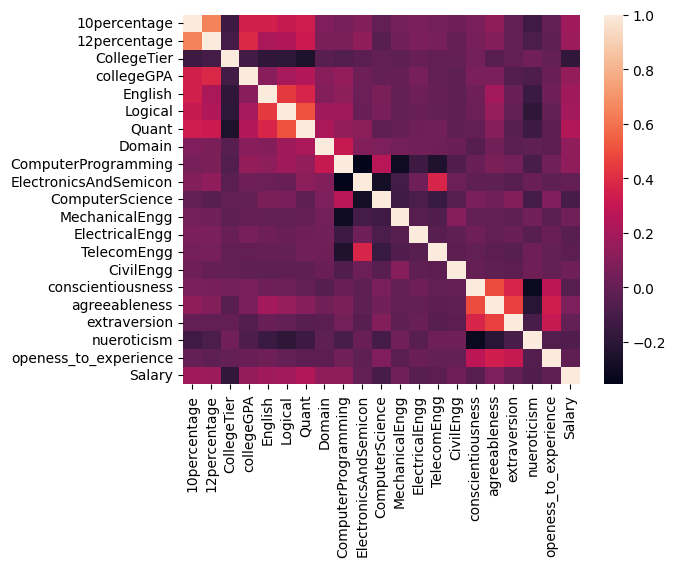

In [ ]:
sns.heatmap(df.corr())

In [ ]:
pip install -U klib

In [ ]:
import klib

<Axes: title={'center': 'Feature-correlation (pearson)'}>

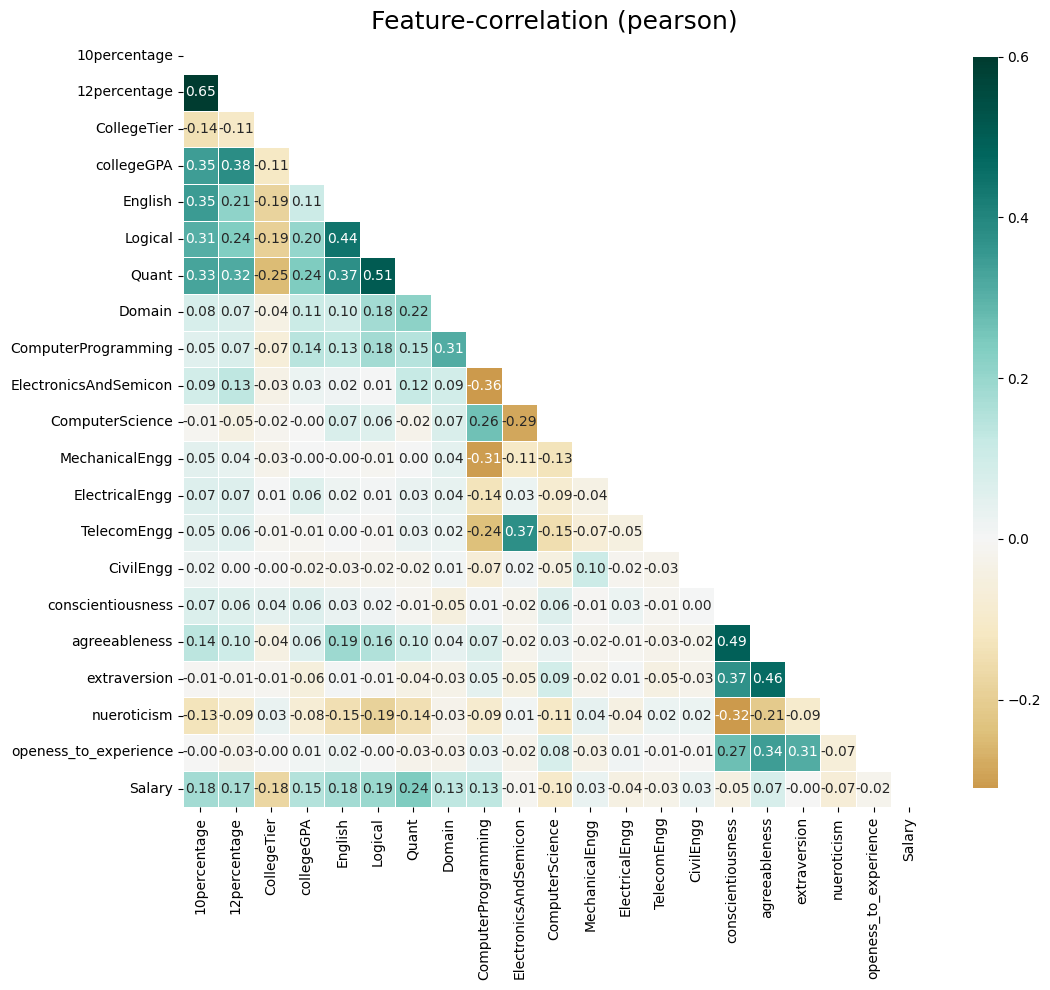

In [ ]:
klib.corr_plot(df)

GridSpec(6, 3)

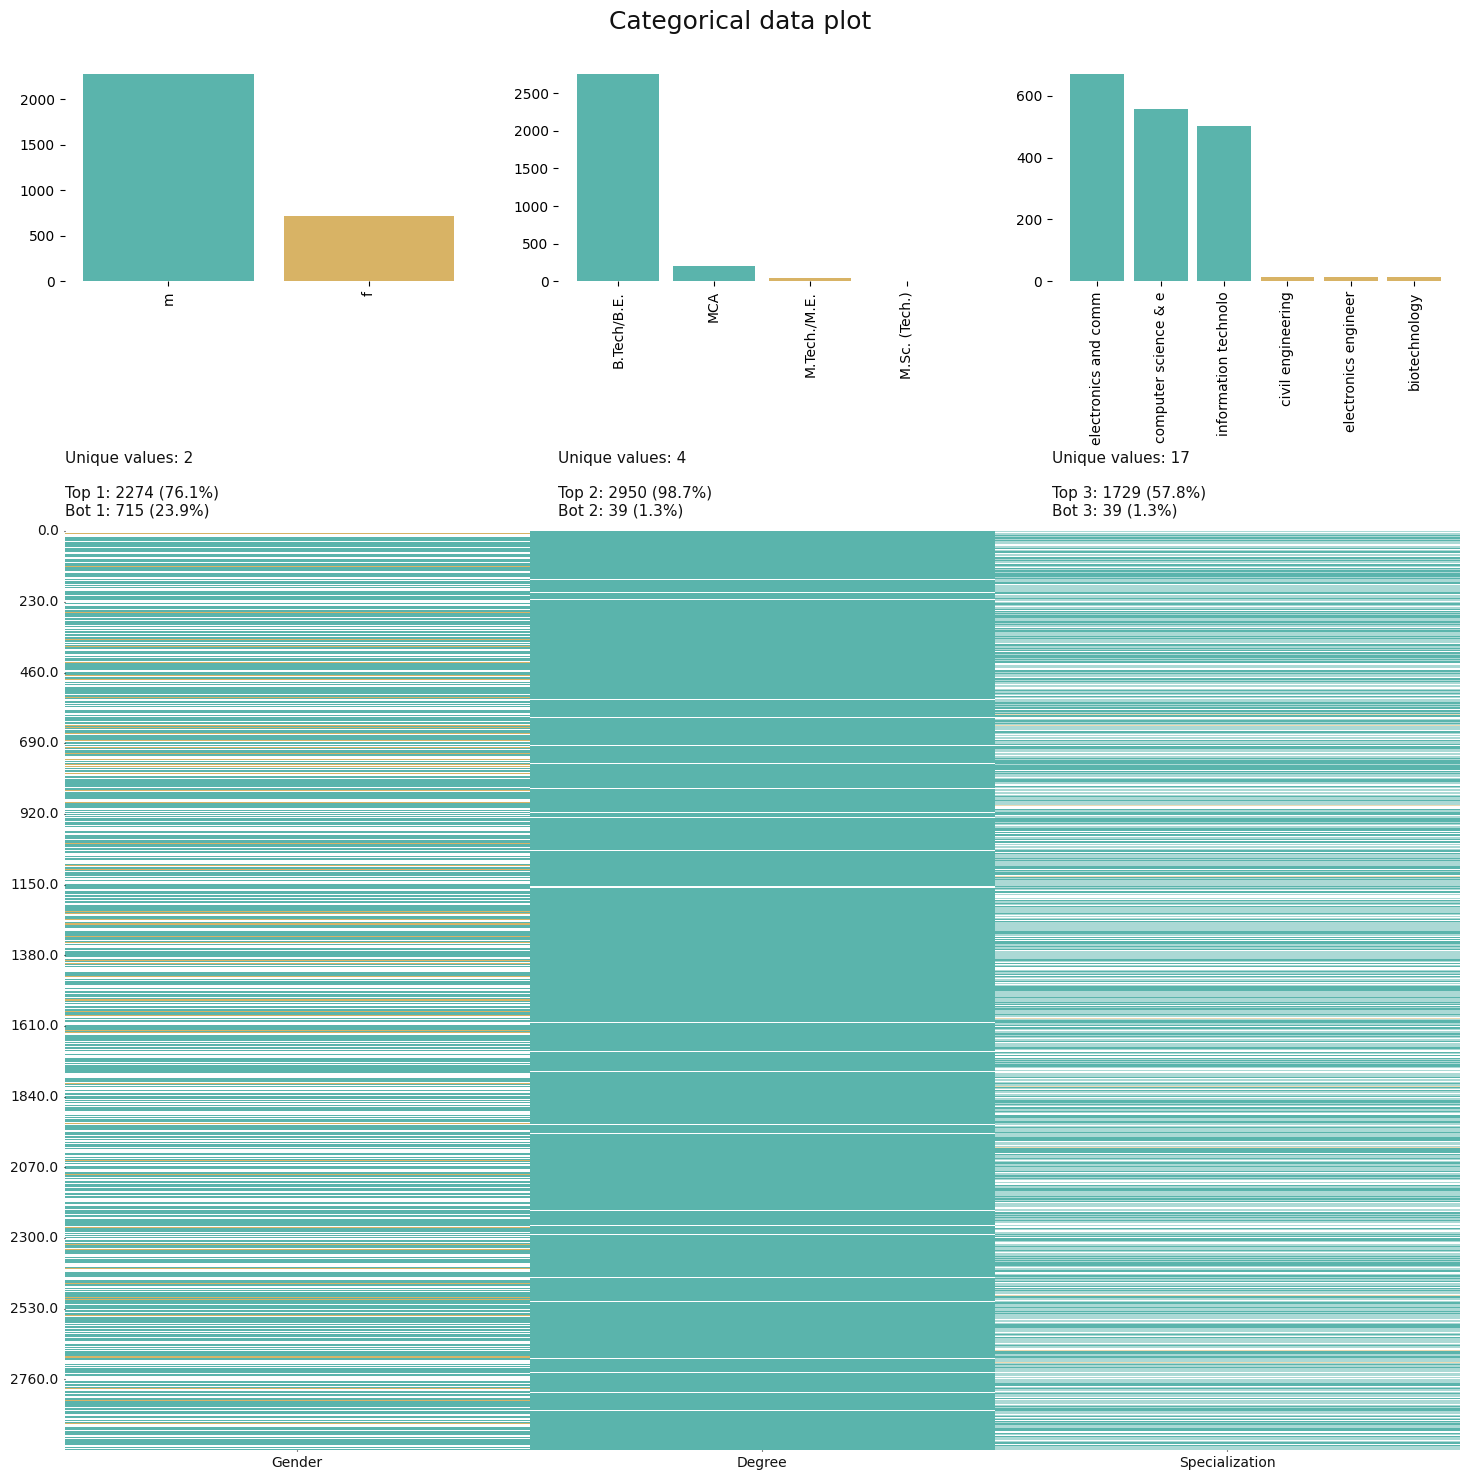

In [ ]:
klib.cat_plot(df)

Note: The number of non binary numerical features is very large (20), please consider splitting the data. Showing plots for the first 20 numerical features. Override this by setting showall=True.


<Axes: xlabel='10percentage', ylabel='Density'>

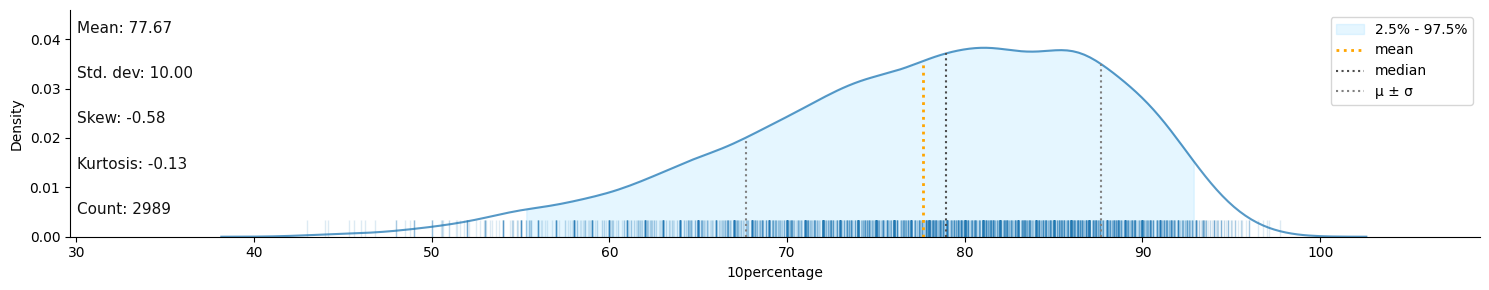

In [ ]:
klib.dist_plot(df)

Displaying negative correlations. Specify a negative "threshold" to limit the results further.
Displaying positive correlations. Specify a positive "threshold" to limit the results further.


<Axes: title={'center': 'Feature-correlation (pearson)'}>

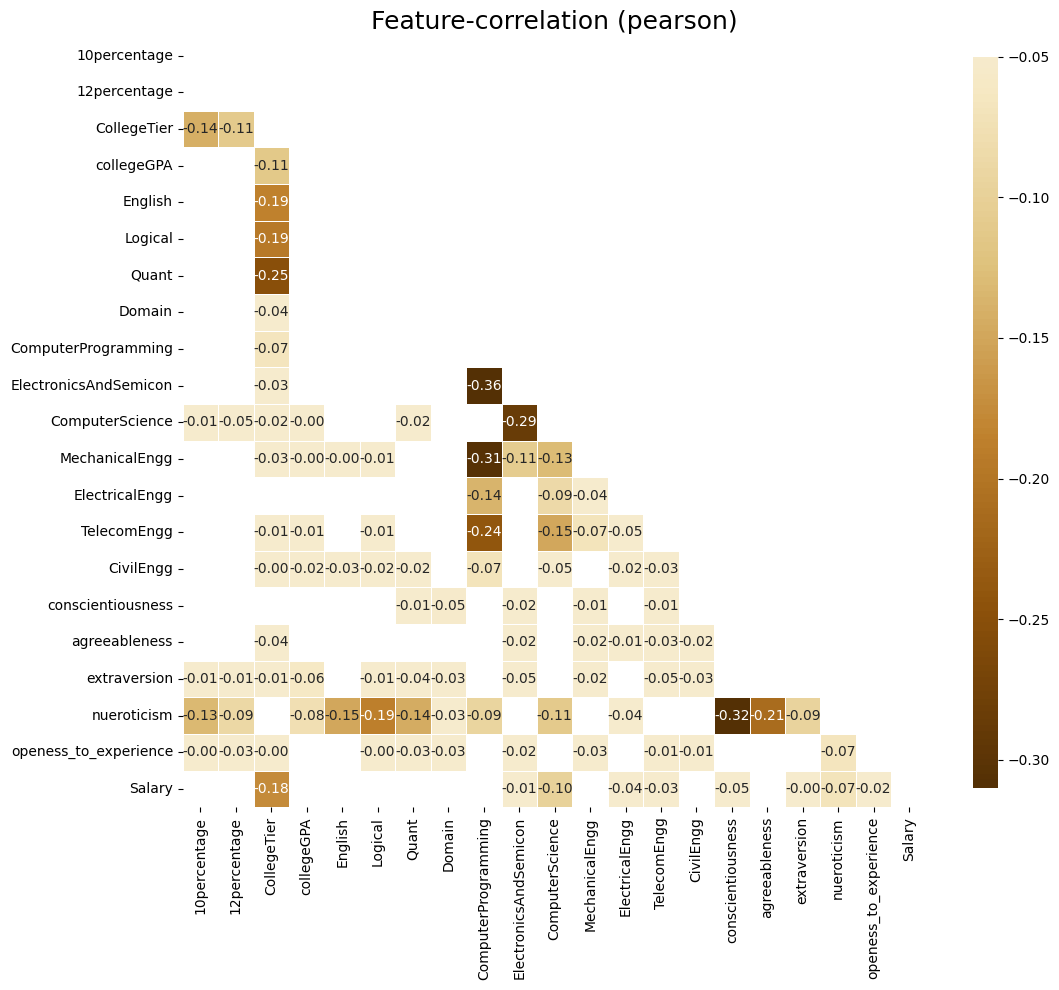

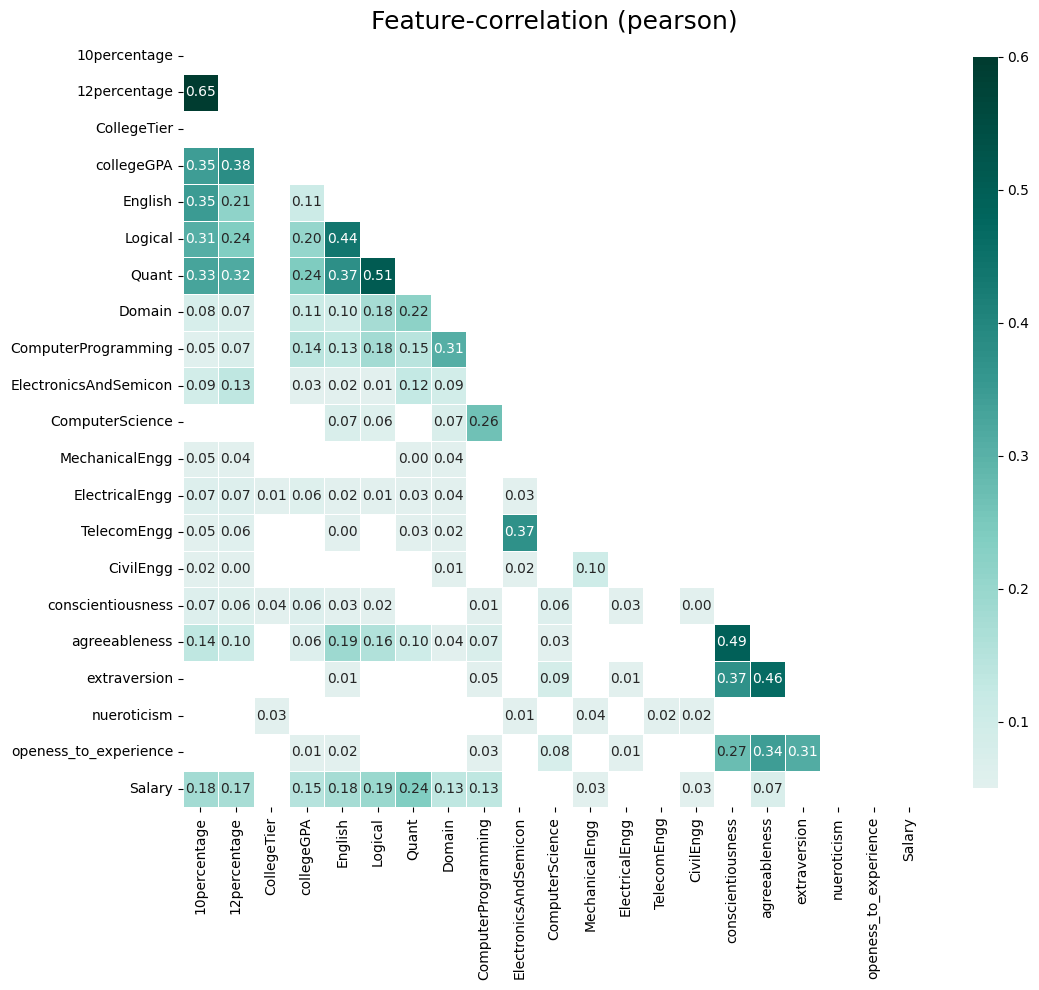

In [ ]:
klib.corr_plot(df, split = 'neg')
klib.corr_plot(df, split = 'pos')

EDA(Exploratory Data Analysis)

In [ ]:
data = df.corr().fillna(0)
data.round(-1)

<ipython-input-411-9b97a7ca7fa9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = df.corr().fillna(0)


,10percentage,12percentage,CollegeTier,collegeGPA,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
10percentage,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0
12percentage,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0
CollegeTier,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0
collegeGPA,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0
English,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0
Logical,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0
Quant,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0
Domain,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0
ComputerProgramming,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0
ElectronicsAndSemicon,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,...,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/Engineering_graduate_salary.csv')

# Check the columns in the dataframe
print(df.columns)

# Assuming 'Gender' exists in the columns, create dummy variables for the 'Gender' column
df_encoded = pd.get_dummies(df, columns=['Gender'], drop_first=True)

# Display the encoded dataframe
print(df_encoded)


Index(['ID', 'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'Salary'],
      dtype='object')
          ID         DOB  10percentage                       10board  \
0     604399  22-10-1990         87.80                          cbse   
1     988334  15-05-1990         57.00                          cbse   
2     301647  21-08-1989         77.33  maharashtra state board,pune   
3     582313  04-05-1991         84.30                          cbse   
4     339001  30-10-1990         82.00              

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/Engineering_graduate_salary.csv')

# Check the columns in the dataframe
print(df.columns)

# Assuming 'Specialization' exists in the columns, create dummy variables for the 'Specialization' column
df_encoded = pd.get_dummies(df, columns=['Specialization'], drop_first=True)

# Display the encoded dataframe
print(df_encoded)


Index(['ID', 'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'Salary'],
      dtype='object')
          ID Gender         DOB  10percentage                       10board  \
0     604399      f  22-10-1990         87.80                          cbse   
1     988334      m  15-05-1990         57.00                          cbse   
2     301647      m  21-08-1989         77.33  maharashtra state board,pune   
3     582313      m  04-05-1991         84.30                          cbse   
4     339001     

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/Engineering_graduate_salary.csv')

# Check the columns in the dataframe
print(df.columns)

# Assuming 'Degree' exists in the columns, create dummy variables for the 'Degree' column
df_encoded = pd.get_dummies(df, columns=['Degree'], drop_first=True)

# Display the encoded dataframe
print(df_encoded)


Index(['ID', 'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'Salary'],
      dtype='object')
          ID Gender         DOB  10percentage                       10board  \
0     604399      f  22-10-1990         87.80                          cbse   
1     988334      m  15-05-1990         57.00                          cbse   
2     301647      m  21-08-1989         77.33  maharashtra state board,pune   
3     582313      m  04-05-1991         84.30                          cbse   
4     339001     

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/Engineering_graduate_salary.csv')

# Create dummy variables for 'Gender', 'Specialization', and 'Degree'
gender_dummies = pd.get_dummies(df['Gender'], prefix='Gender', drop_first=True)
specialization_dummies = pd.get_dummies(df['Specialization'], prefix='Specialization', drop_first=True)
degree_dummies = pd.get_dummies(df['Degree'], prefix='Degree', drop_first=True)

# Concatenate the dummy variables with the original DataFrame
df_concatenated = pd.concat([df, gender_dummies, specialization_dummies, degree_dummies], axis=1)

# Display the concatenated dataframe
print(df_concatenated)


          ID Gender         DOB  10percentage                       10board  \
0     604399      f  22-10-1990         87.80                          cbse   
1     988334      m  15-05-1990         57.00                          cbse   
2     301647      m  21-08-1989         77.33  maharashtra state board,pune   
3     582313      m  04-05-1991         84.30                          cbse   
4     339001      f  30-10-1990         82.00                          cbse   
...      ...    ...         ...           ...                           ...   
2993  103174      f  17-04-1989         75.00                             0   
2994  352811      f  22-07-1991         84.00                   state board   
2995  287070      m  24-11-1988         91.40                         bsemp   
2996  317336      m  25-08-1988         88.64     karnataka education board   
2997  993701      m  27-05-1992         77.00                   state board   

      12graduation  12percentage                   

In [ ]:
df.drop(['ID','DOB','10board','12graduation','12board','CollegeID','CollegeCityID', 'CollegeCityTier',
       'CollegeState','GraduationYear','Gender','Degree','Specialization','10percentage'],axis = 1,inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   12percentage           2998 non-null   float64
 1   CollegeTier            2998 non-null   int64  
 2   collegeGPA             2998 non-null   float64
 3   English                2998 non-null   int64  
 4   Logical                2998 non-null   int64  
 5   Quant                  2998 non-null   int64  
 6   Domain                 2998 non-null   float64
 7   ComputerProgramming    2998 non-null   int64  
 8   ElectronicsAndSemicon  2998 non-null   int64  
 9   ComputerScience        2998 non-null   int64  
 10  MechanicalEngg         2998 non-null   int64  
 11  ElectricalEngg         2998 non-null   int64  
 12  TelecomEngg            2998 non-null   int64  
 13  CivilEngg              2998 non-null   int64  
 14  conscientiousness      2998 non-null   float64
 15  agre

In [ ]:
df.columns

Index(['12percentage', 'CollegeTier', 'collegeGPA', 'English', 'Logical',
       'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'Salary'],
      dtype='object')

setting the range of a salary

In [ ]:
max_salary = df['Salary'].max()
min_salary = df['Salary'].min()
print(f"Maximum Salary: {max_salary}")
print(f"Minimum Salary: {min_salary}")

Maximum Salary: 4000000
Minimum Salary: 35000


In [ ]:
mean_salary = df['Salary'].mean()
print(f"the mean Salary is : {mean_salary}")

the mean Salary is : 305174.7831887925


In [ ]:
def classify_salary(salary):
    if salary >= mean_salary:
      return 0
    else:
      return 1
df['salary Range']= df['Salary'].apply(classify_salary)
print(df)

      12percentage  CollegeTier  collegeGPA  English  Logical  Quant  \
0            84.00            1       73.82      650      665    810   
1            64.50            2       65.00      440      435    210   
2            85.17            2       61.94      485      475    505   
3            86.00            1       80.40      675      620    635   
4            75.00            2       64.30      575      495    365   
...            ...          ...         ...      ...      ...    ...   
2993         73.00            2       70.00      505      485    445   
2994         77.00            2       75.20      345      585    395   
2995         65.56            2       73.19      385      425    485   
2996         65.16            2       74.81      465      645    505   
2997         75.50            2       69.30      370      390    285   

        Domain  ComputerProgramming  ElectronicsAndSemicon  ComputerScience  \
0     0.694479                  485                    3

In [ ]:
print(df.head(5))

   12percentage  CollegeTier  collegeGPA  English  Logical  Quant    Domain  \
0         84.00            1       73.82      650      665    810  0.694479   
1         64.50            2       65.00      440      435    210  0.342315   
2         85.17            2       61.94      485      475    505  0.824666   
3         86.00            1       80.40      675      620    635  0.990009   
4         75.00            2       64.30      575      495    365  0.278457   

   ComputerProgramming  ElectronicsAndSemicon  ComputerScience  ...  \
0                  485                    366               -1  ...   
1                  365                     -1               -1  ...   
2                   -1                    400               -1  ...   
3                  655                     -1               -1  ...   
4                  315                     -1               -1  ...   

   ElectricalEngg  TelecomEngg  CivilEngg  conscientiousness  agreeableness  \
0              -1  

In [ ]:
df.columns

Index(['12percentage', 'CollegeTier', 'collegeGPA', 'English', 'Logical',
       'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'Salary', 'salary Range'],
      dtype='object')

Traning and Testing


In [ ]:
df = df.drop('Salary', axis=1)

In [ ]:
X = df.drop(['salary Range'], axis=1)
y = df['salary Range']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size =0.3,random_state =42)

In [ ]:
print(X_test.shape)
print(X_train.shape)

(900, 19)
(2098, 19)


Model fitting

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size =0.3,random_state =42)
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_predict = clf.predict(X_test)
print("the accuracy is :",metrics.accuracy_score(y_predict,y_test))

the accuracy is : 0.6211111111111111


Pre prunning

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
clf = DecisionTreeClassifier(
    max_depth=5,
    min_samples_leaf=2,
    random_state=42
)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print("Accuracy is :", accuracy)

Accuracy is : 0.6766666666666666


post Prunning

In [ ]:
pruned_tree = DecisionTreeClassifier(min_samples_leaf=2)
pruned_tree.fit(X_train, y_train)
y_predict_pruned = pruned_tree.predict(X_test)
accuracy_after_pruning = accuracy_score(y_test, y_predict_pruned)
print("Accuracy after pruning:", accuracy_after_pruning)

Accuracy after pruning: 0.6266666666666667


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

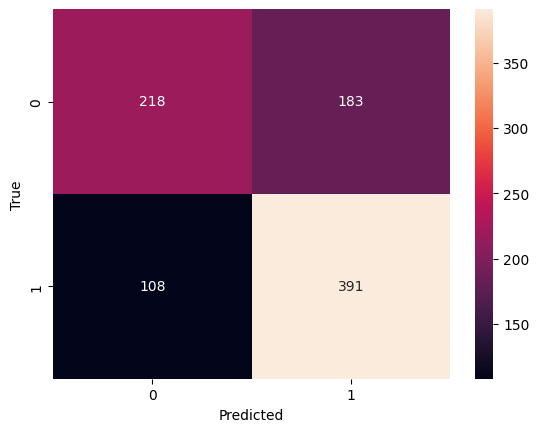

In [ ]:
cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# Precision
precision = precision_score(y_test, y_predict)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_predict)
print("Recall:", recall)

# F1-Score
f1 = f1_score(y_test, y_predict)
print("F1-Score:", f1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_predict)
print("Confusion Matrix:")
print(conf_matrix)

Precision: 0.681184668989547
Recall: 0.7835671342685371
F1-Score: 0.7287977632805218
Confusion Matrix:
[[218 183]
 [108 391]]


Naive bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size =0.35,random_state = 34)
gnb.fit(X_train,y_train)
y_predict = gnb.predict(X_test)
print("the accuracy is : ",metrics.accuracy_score(y_predict,y_test))

the accuracy is :  0.6704761904761904


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:

# Precision
precision = precision_score(y_test, y_predict)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_predict)
print("Recall:", recall)

# F1-Score
f1 = f1_score(y_test, y_predict)
print("F1-Score:", f1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_predict)
print("Confusion Matrix:")
print(conf_matrix)

Precision: 0.6700581395348837
Recall: 0.7948275862068965
F1-Score: 0.7271293375394321
Confusion Matrix:
[[243 227]
 [119 461]]


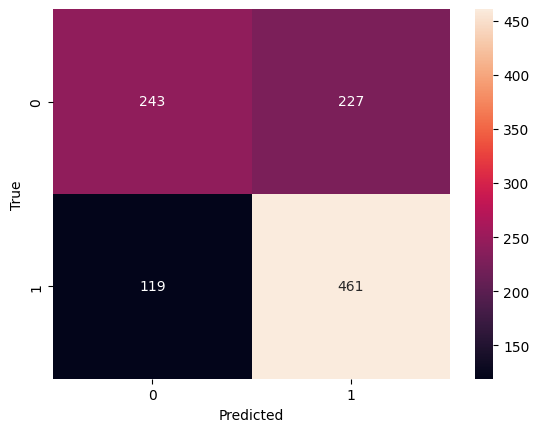

In [ ]:
cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

KNN CLASSIFIER

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size =0.25,random_state = 34)
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
print("the accuracy is :",metrics.accuracy_score(y_predict,y_test))

the accuracy is : 0.6586666666666666


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:

# Precision
precision = precision_score(y_test, y_predict)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_predict)
print("Recall:", recall)

# F1-Score
f1 = f1_score(y_test, y_predict)
print("F1-Score:", f1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_predict)
print("Confusion Matrix:")
print(conf_matrix)

Precision: 0.6824644549763034
Recall: 0.7024390243902439
F1-Score: 0.6923076923076923
Confusion Matrix:
[[206 134]
 [122 288]]


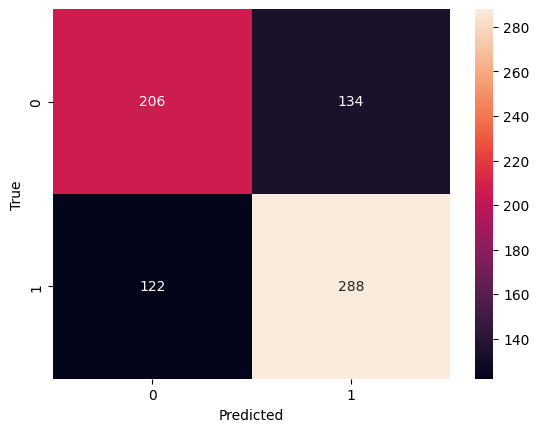

In [ ]:
cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size =0.35,random_state = 34)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_predict = logreg.predict(X_test)
print("the accuracy is :",metrics.accuracy_score(y_predict,y_test))

the accuracy is : 0.6619047619047619


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
precision = precision_score(y_test, y_predict)

In [ ]:
print(f"Precision: {precision}")

Precision: 0.676056338028169


In [ ]:
recall = recall_score(y_test, y_predict)
print("Recall:", recall)

Recall: 0.7448275862068966


In [ ]:
f1 = f1_score(y_test, y_predict)
print("F1-Score:", f1)

F1-Score: 0.7087776866283838


In [ ]:
conf_matrix = confusion_matrix(y_test, y_predict)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[263 207]
 [148 432]]


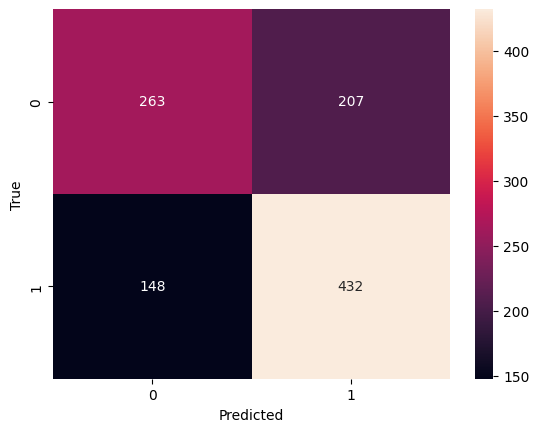

In [ ]:
cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

RANDOM FOREST ALGORITHM

In [ ]:
from sklearn.ensemble import RandomForestClassifier
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size =0.35,random_state = 43)
model = RandomForestClassifier(n_estimators=350,random_state = 43)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print("the accuracy is :",metrics.accuracy_score(y_predict,y_test))

the accuracy is : 0.7133333333333334


In [ ]:

# Precision
precision = precision_score(y_test, y_predict)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_predict)
print("Recall:", recall)

# F1-Score
f1 = f1_score(y_test, y_predict)
print("F1-Score:", f1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_predict)
print("Confusion Matrix:")
print(conf_matrix)

Precision: 0.7202572347266881
Recall: 0.7791304347826087
F1-Score: 0.7485380116959063
Confusion Matrix:
[[301 174]
 [127 448]]


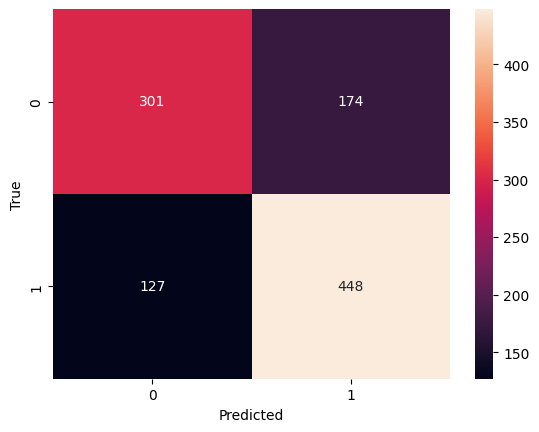

In [ ]:
cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
df.columns

Index(['12percentage', 'CollegeTier', 'collegeGPA', 'English', 'Logical',
       'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'salary Range'],
      dtype='object')

In [ ]:
dt_count = df['salary Range'].value_counts()
print("The number of zero's and one's are :/n",dt_count)

The number of zero's and one's are :/n 1    1662
0    1336
Name: salary Range, dtype: int64


In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

# Calculate VIF for each variable
 vif = pd.DataFrame()
 vif["Variable"] = X.columns
 vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 return(vif)
calc_vif(X)


,Variable,VIF
0,12percentage,55.179913
1,CollegeTier,32.997199
2,collegeGPA,71.265747
3,English,30.569075
4,Logical,50.635389
5,Quant,29.523205
6,Domain,2.850359
7,ComputerProgramming,7.298319
8,ElectronicsAndSemicon,2.143254
9,ComputerScience,1.516165


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from sklearn import datasets

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   12percentage           2998 non-null   float64
 1   CollegeTier            2998 non-null   int64  
 2   collegeGPA             2998 non-null   float64
 3   English                2998 non-null   int64  
 4   Logical                2998 non-null   int64  
 5   Quant                  2998 non-null   int64  
 6   Domain                 2998 non-null   float64
 7   ComputerProgramming    2998 non-null   int64  
 8   ElectronicsAndSemicon  2998 non-null   int64  
 9   ComputerScience        2998 non-null   int64  
 10  MechanicalEngg         2998 non-null   int64  
 11  ElectricalEngg         2998 non-null   int64  
 12  TelecomEngg            2998 non-null   int64  
 13  CivilEngg              2998 non-null   int64  
 14  conscientiousness      2998 non-null   float64
 15  agre

In [ ]:
features = df.drop('salary Range', axis=1)
target = df['salary Range']

In [ ]:
target = pd.get_dummies(target)


In [ ]:
train_data, test_data, train_targets, test_targets = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


In [ ]:
import numpy as np

train_data = np.array(train_data).astype('float32')
train_targets = np.array(train_targets).astype('float32')


In [ ]:
target = pd.get_dummies(target)  # Ensure one-hot encoding for multi-class classification


In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers
from sklearn.preprocessing import StandardScaler


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential([
    Dense(54, activation='relu', input_shape=(train_data.shape[1],)),
    Dense(44, activation='relu'),
    Dense(22, activation='relu'),
    Dense(10, activation='relu'),
    Dense(target.shape[1], activation='sigmoid')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_data, train_targets, epochs=100, validation_split=0.2, verbose=2)

Epoch 1/100
60/60 - 2s - loss: 3.9210 - accuracy: 0.5099 - val_loss: 1.1866 - val_accuracy: 0.4833 - 2s/epoch - 41ms/step
Epoch 2/100
60/60 - 0s - loss: 1.0730 - accuracy: 0.5417 - val_loss: 1.0115 - val_accuracy: 0.5813 - 309ms/epoch - 5ms/step
Epoch 3/100
60/60 - 0s - loss: 1.1452 - accuracy: 0.5553 - val_loss: 1.0245 - val_accuracy: 0.4938 - 314ms/epoch - 5ms/step
Epoch 4/100
60/60 - 0s - loss: 0.8843 - accuracy: 0.5657 - val_loss: 1.2471 - val_accuracy: 0.4771 - 273ms/epoch - 5ms/step
Epoch 5/100
60/60 - 0s - loss: 0.8303 - accuracy: 0.5938 - val_loss: 0.8106 - val_accuracy: 0.6000 - 275ms/epoch - 5ms/step
Epoch 6/100
60/60 - 0s - loss: 0.7922 - accuracy: 0.5959 - val_loss: 0.8530 - val_accuracy: 0.5667 - 302ms/epoch - 5ms/step
Epoch 7/100
60/60 - 0s - loss: 0.7689 - accuracy: 0.5876 - val_loss: 0.8407 - val_accuracy: 0.5792 - 413ms/epoch - 7ms/step
Epoch 8/100
60/60 - 0s - loss: 0.7955 - accuracy: 0.5813 - val_loss: 0.8275 - val_accuracy: 0.5708 - 333ms/epoch - 6ms/step
Epoch 9/10

In [ ]:
test_loss, test_accuracy = model.evaluate(test_data, test_targets)
print(f"Test Accuracy: {test_accuracy}")

19/19 [==============================] - 0s 2ms/step - loss: 0.7435 - accuracy: 0.6067
Test Accuracy: 0.6066666841506958


In [ ]:
predictions = model.predict(test_data)

19/19 [==============================] - 0s 2ms/step


In [ ]:
predicted_classes = np.argmax(predictions, axis=1)

In [ ]:
true_classes = np.argmax(test_targets.values, axis=1)

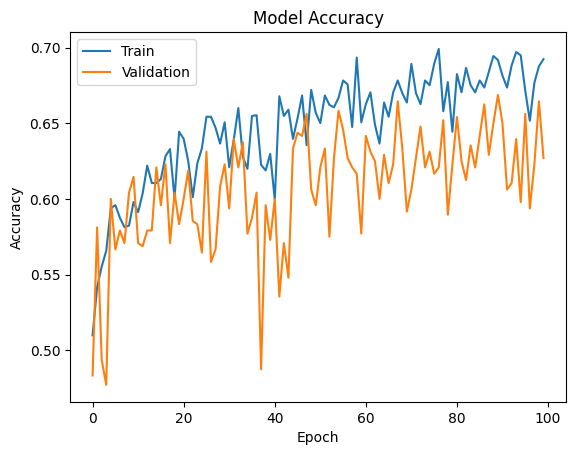

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

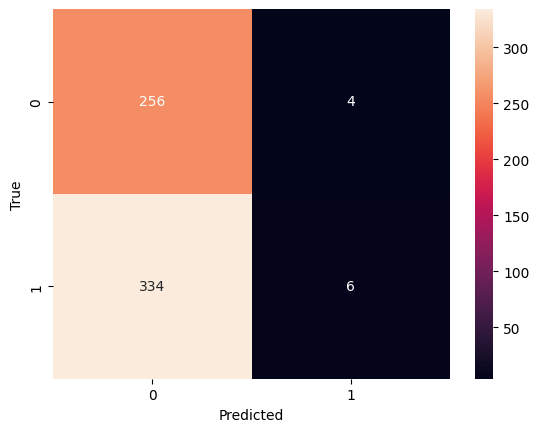

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(true_classes, predicted_classes)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()